# Part II - Explanatory data analysis of FordGoBike SF Bay area February 2019 trip data.
## by Gilbert Adikankwu


## Investigation Overview

My goal for this investigation is look at how trip duration can be predicted based off the typical details of any trip.



## Dataset Overview

This data consist of 183412 bike trips, including features like duration, members age and user type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('gobike.csv')
df.head(5)

,index,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_gender,bike_share_for_all_trip,trip_start_month,trip_start_day,trip_start_clock_time,trip_distance,duration_min,member_age,start_hour,time_of_day
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,...,Male,No,February,Thursday,17:32,544.862400,869.750000,35,17,Evening
1,1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,...,Other,No,February,Thursday,18:53,1743.491587,708.683333,34,18,Evening
2,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),...,Male,No,February,Thursday,12:13,2705.309247,1030.900000,47,12,Afternoon
3,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,...,Other,No,February,Thursday,17:54,260.812211,608.166667,30,17,Evening
4,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,...,Male,Yes,February,Thursday,23:54,2409.982117,26.416667,45,23,Night


In [3]:
col = ['index', 'start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude']
df.drop(columns=col, inplace=True)

In [4]:
# Create custom helper function to write axis and title for any plot
def plot_element(xlabel,ylabel,title):
    '''
    helper function that writes axis labels 
    and plot title 
    '''
    plt.xlabel(xlabel, fontsize=15) # write x-axis label  
    plt.ylabel(ylabel, fontsize=15) # write y-axis label 
    plt.title(title, fontsize=20) # write plot title

## Distribution of trip duration.

On a Log scale of trip duration in minutes, the distribution of trip duration looks roughly unimodal with one peak which indicates that most of the trips lasted for approximately 10 minutes.

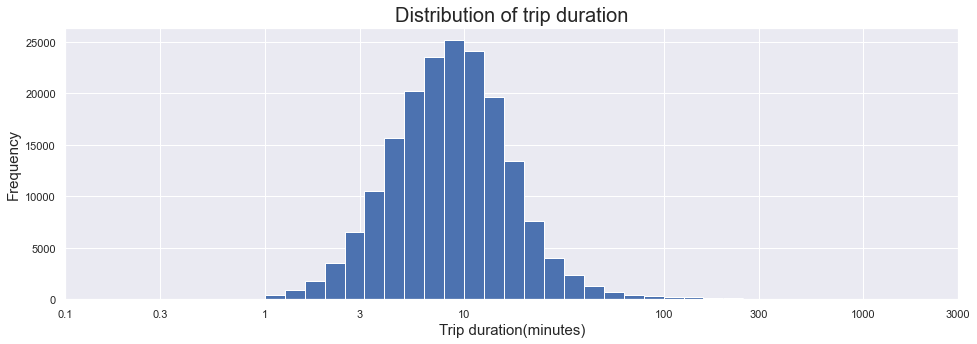

In [5]:
np.log10(df['duration_min'].describe())

log_bin = 0.1
bin_width = 10**np.arange(0,3.15+log_bin, log_bin)
ticks = [0.1, 0.3, 1, 3, 10, 100, 300, 1000, 3000]
labels =['{}'.format(x) for x in ticks]

plt.figure(figsize=[16,5])
sb.set_theme(style='darkgrid')
plt.hist(data=df, x='duration_min', bins=bin_width);
plt.xscale('log')
plt.xticks(ticks, labels)
plot_element(xlabel='Trip duration(minutes)', ylabel='Frequency', title='Distribution of trip duration')

## Distribution of members age

Most of the members are under age of 40 years. The distribution is righ-skewed and roughly unimodal. Also, there are outlier ages.

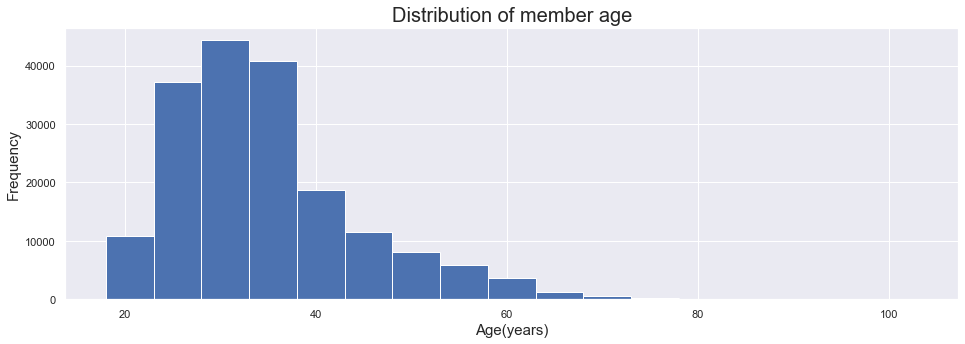

In [6]:
bin_size = 5
bin_width2 = np.arange(18, df['member_age'].max()+bin_size, bin_size)

plt.figure(figsize=[16,5])
plt.hist(data=df, x='member_age', bins = bin_width2)
plot_element('Age(years)', 'Frequency', 'Distribution of member age')

## Trip duration vs member age
Members aged 18 - 48 years did the majority of all the trips that lasted for a duration of 200 minutes and above.

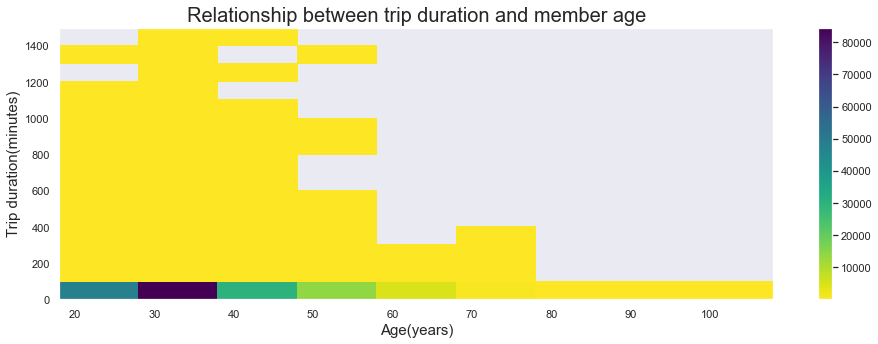

In [7]:
plt.figure(figsize=[16,5])
bins_x = np.arange(18,99+10, 10)
bins_y = np.arange(0, 1424+100, 100)

h2d = plt.hist2d(data=df, x='member_age', y='duration_min', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar();
plot_element('Age(years)', 'Trip duration(minutes)', 'Relationship between trip duration and member age')

## Average trip duration of each day of the week.

Despite Saturday and Sunday been the days of the week with the lowest number of trips, they both have a significantly higher average trip duration when compared to the other days. 

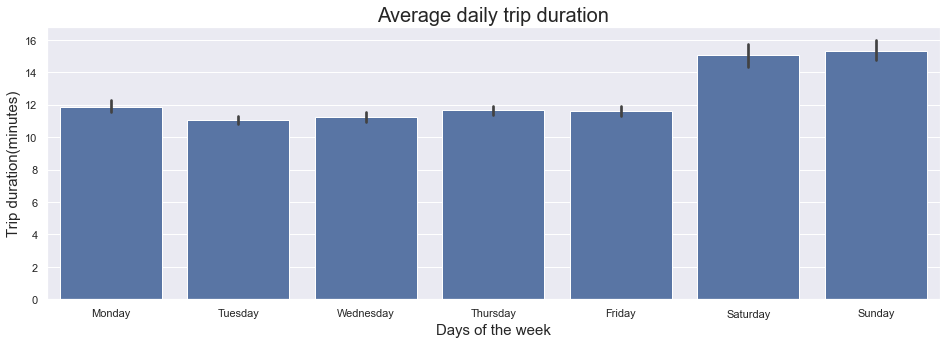

In [10]:
plt.figure(figsize=(16,5))
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
base_color=sb.color_palette()[0]
sb.barplot(data=df, x='trip_start_day', y='duration_min', color=base_color, order=days_order);
plot_element('Days of the week', 'Trip duration(minutes)', 'Average daily trip duration')

## Average trip duration of each user types
The average trip duration of Customer users is more than twice the average trip duration of the subscriber users.

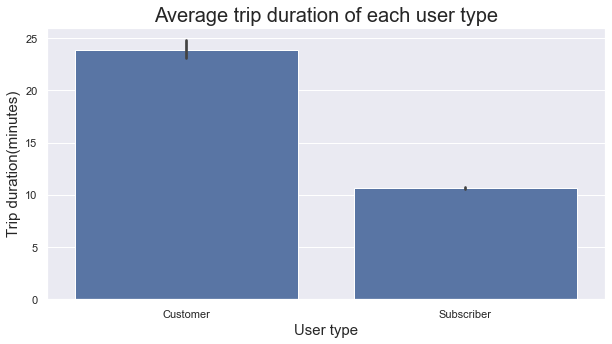

In [11]:
plt.figure(figsize=[10,5])
sb.barplot(data=df, x='user_type', y='duration_min', color=base_color);
plot_element('User type', 'Trip duration(minutes)', 'Average trip duration of each user type')

## Trip duration by week day and user type

On Every day of the week the customers tend to use more time than the subscribers on the bikes. 

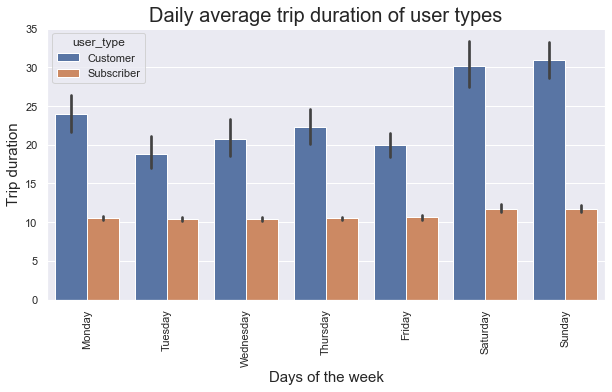

In [12]:
plt.figure(figsize=[10,5])
sb.barplot(data=df, x='trip_start_day', y='duration_min', order=days_order, hue='user_type')
plt.xticks(rotation=90);
plot_element(xlabel='Days of the week', ylabel='Trip duration', title='Daily average trip duration of user types')